In [74]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

### Step - 1 : Split the data into training and testing sets

In [75]:
car_data = pd.read_csv("car-data.csv")

In [76]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### From the information above, we can observe that there is no missing data in any of the rows

In [77]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [78]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [79]:
car_data.value_counts()

Car_Name           Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
fortuner           2015  23.00          30.61          40000       Diesel     Dealer       Automatic     0        2
ertiga             2016  7.75           10.79          43000       Diesel     Dealer       Manual        0        2
800                2003  0.35           2.28           127000      Petrol     Individual   Manual        0        1
ertiga             2015  6.10           7.71           26000       Petrol     Dealer       Manual        0        1
etios g            2014  4.75           6.76           40000       Petrol     Dealer       Manual        0        1
                                                                                                                 ..
Yamaha FZ S V 2.0  2015  0.55           0.84           58000       Petrol     Individual   Manual        0        1
                         0.48           0.84           23000       Petrol    

#### Histograms for the Numerical Attributes:

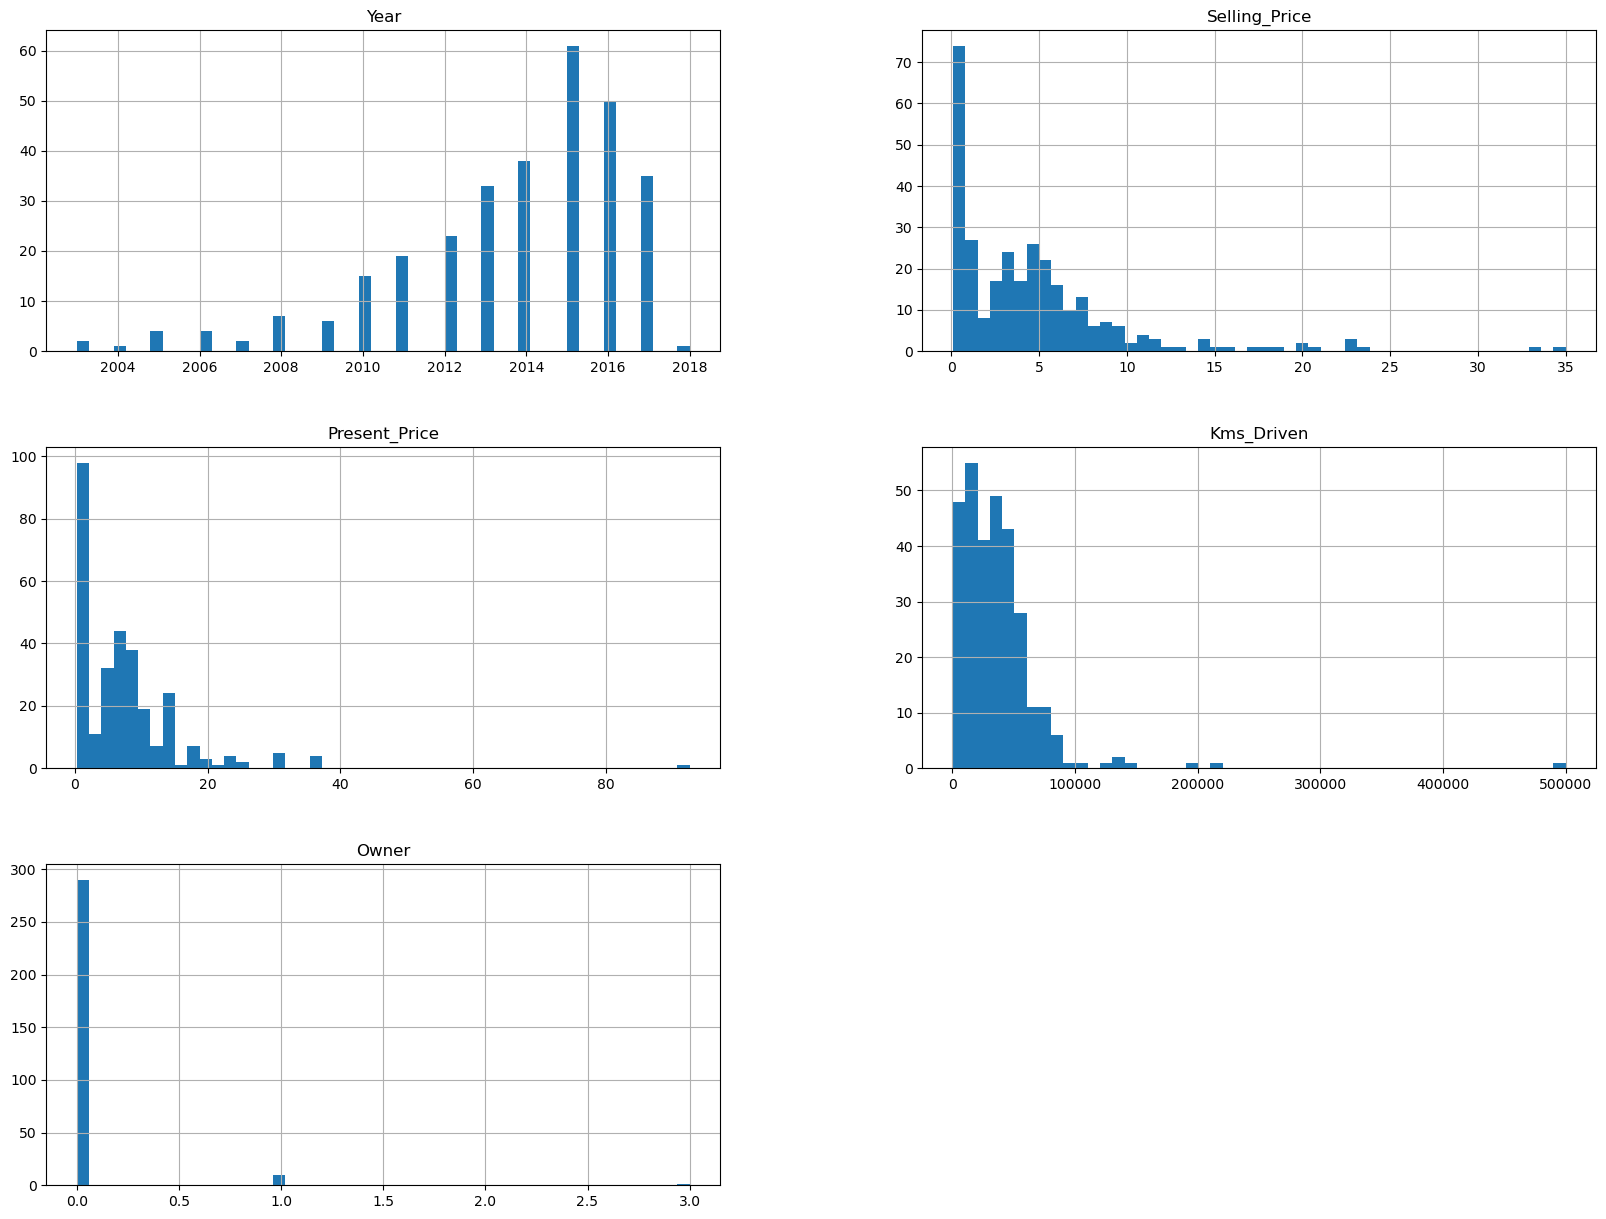

In [80]:
car_data.hist(bins=50, figsize=(20, 15))
plt.show()

#### Creating test-set & training-set using stratified sampling

In [81]:
car_data = car_data.drop("Car_Name", axis=1)
car_data["Year_Cat"] = pd.cut(car_data["Year"], bins=[0., 2005, 2008, 2011, 2014, np.inf]
                             , labels=[1,2,3,4,5])

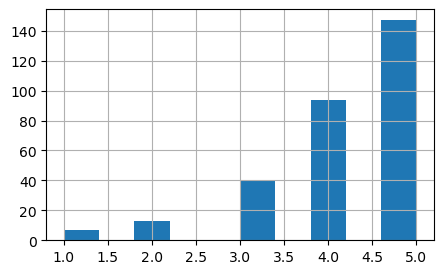

In [82]:
car_data["Year_Cat"].hist(figsize=(5, 3))
plt.show()

In [83]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(car_data, car_data["Year_Cat"]):
    strat_train_set = car_data.loc[train_index]
    strat_test_set = car_data.loc[test_index]

In [84]:
strat_test_set["Year_Cat"].value_counts() / len(strat_test_set)

Year_Cat
5    0.491803
4    0.311475
3    0.131148
2    0.049180
1    0.016393
Name: count, dtype: float64

#### now removing the Year_Cat Attribute

In [85]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Year_Cat", axis=1, inplace=True)

In [86]:
car_data = strat_train_set.copy()


#### visulaizing the training dataset

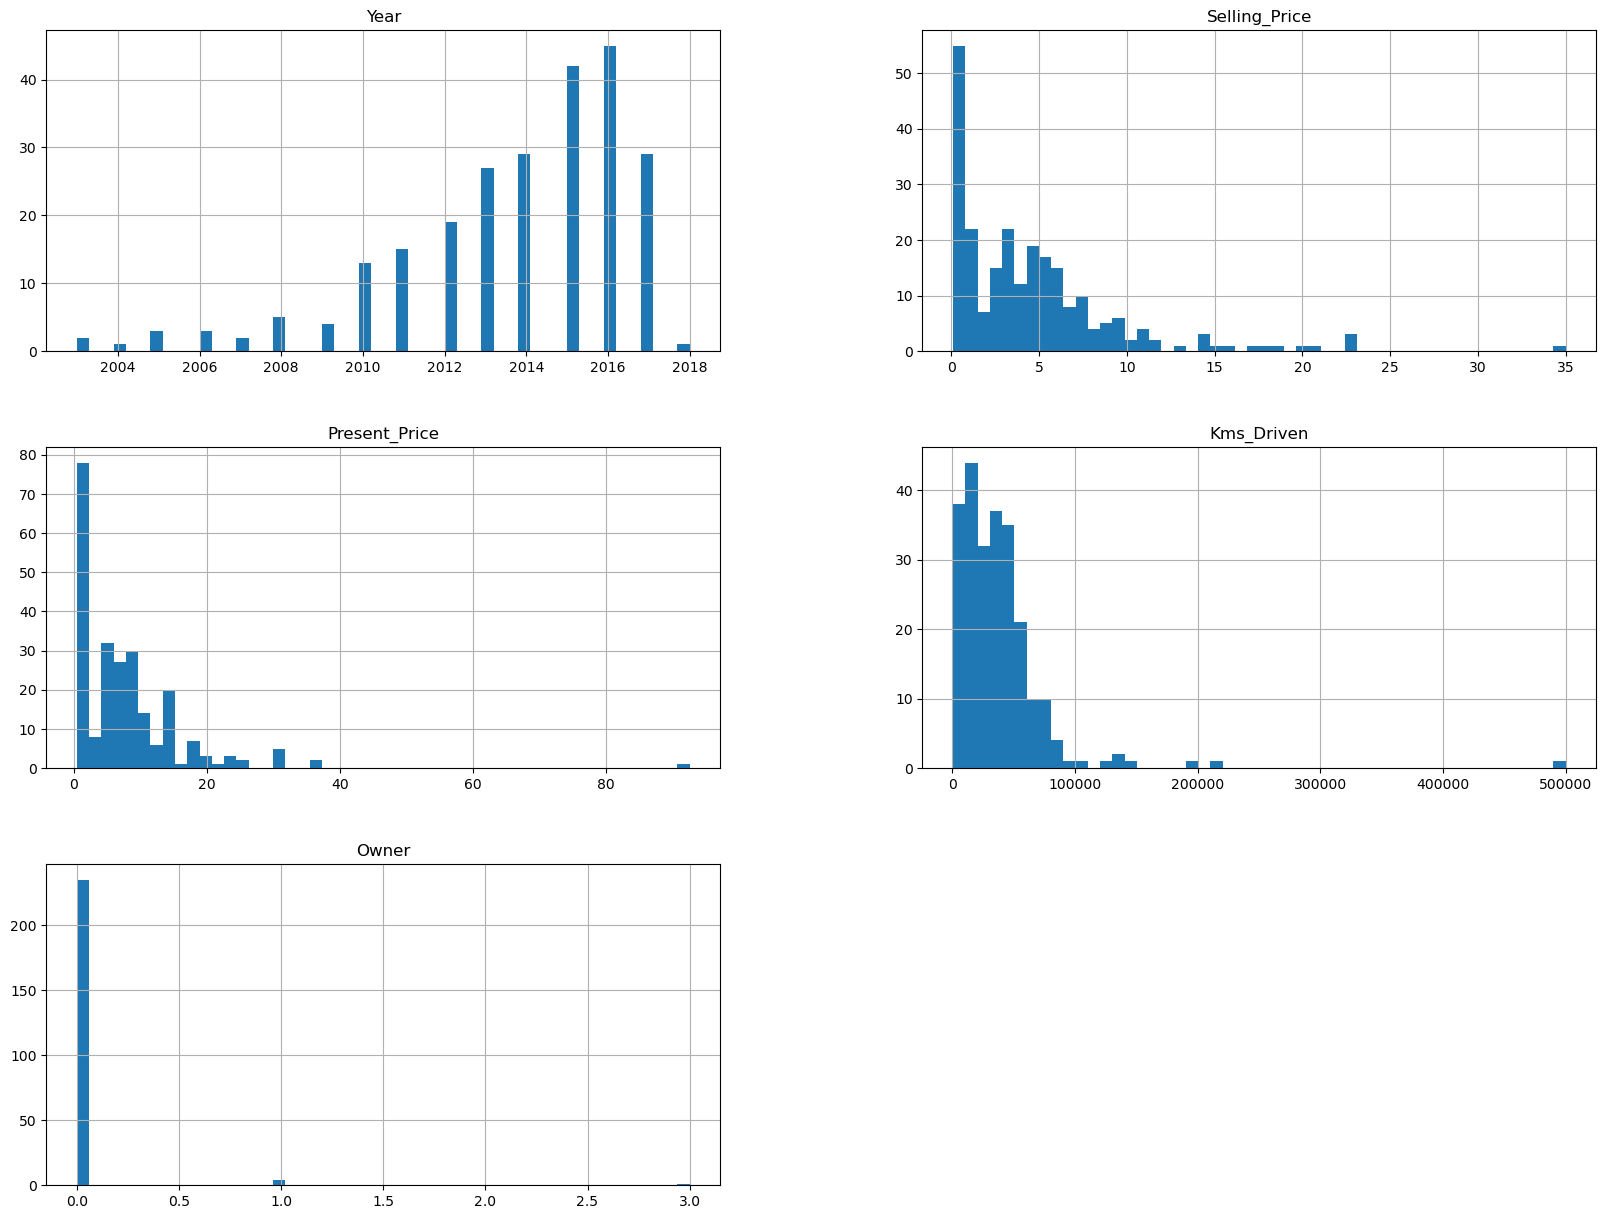

In [87]:
car_data.hist(bins=50, figsize=(20, 15))
plt.show()

### Step - 2 : Experimenting with the training dataset

#### Generating the correlation matrix

In [88]:
car_data.info()
car_data_copy = car_data.copy(deep=True)

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 206 to 118
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           240 non-null    int64  
 1   Selling_Price  240 non-null    float64
 2   Present_Price  240 non-null    float64
 3   Kms_Driven     240 non-null    int64  
 4   Fuel_Type      240 non-null    object 
 5   Seller_Type    240 non-null    object 
 6   Transmission   240 non-null    object 
 7   Owner          240 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 16.9+ KB


In [89]:
corr_matrix = car_data.select_dtypes(include=["int64", "float64"]).corr()

In [90]:
corr_matrix["Selling_Price"].sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.874357
Year             0.190091
Kms_Driven       0.036837
Owner           -0.061959
Name: Selling_Price, dtype: float64

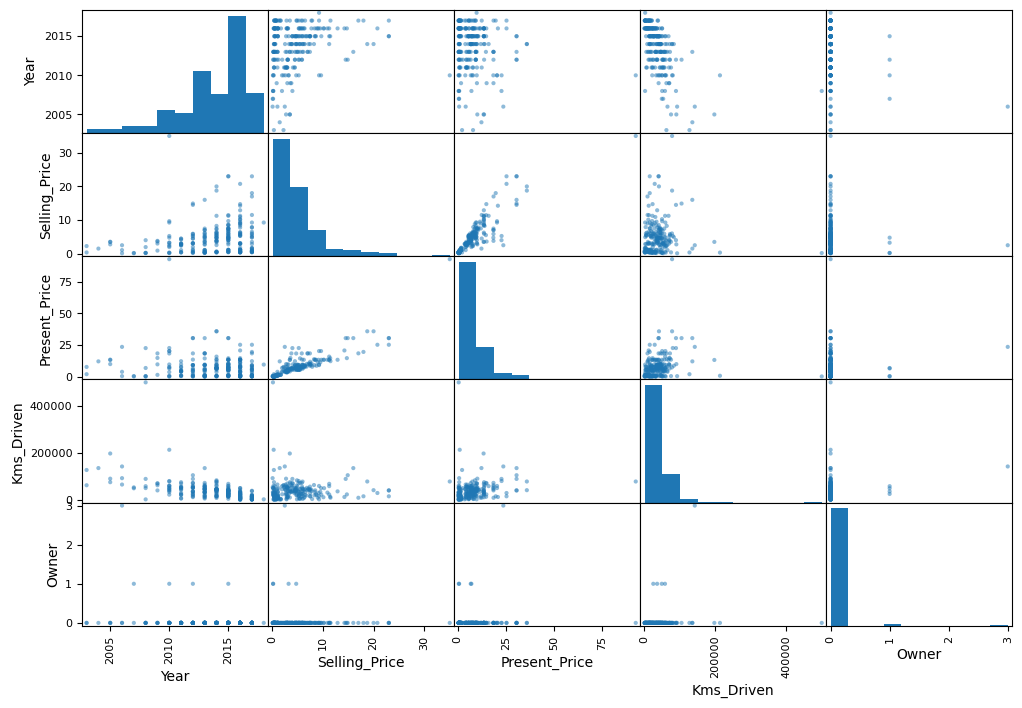

In [91]:
pd.plotting.scatter_matrix(car_data, figsize=(12, 8))
plt.show()

#### Creating new attributes: Kms_Per_Year

In [92]:
current_year=max(car_data["Year"]) + 1

car_data["Kms_Per_Year"] = car_data["Kms_Driven"]/(current_year - car_data["Year"])

In [93]:
corr_matrix = car_data.select_dtypes(include=["int64", "float64"]).corr()

In [94]:
corr_matrix["Selling_Price"].sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.874357
Kms_Per_Year     0.259670
Year             0.190091
Kms_Driven       0.036837
Owner           -0.061959
Name: Selling_Price, dtype: float64

#### Seperating training dataset into inputs and labels

In [95]:
car_input = strat_train_set.drop("Selling_Price", axis=1)
car_labels = strat_train_set["Selling_Price"].copy()

#### One-hot encoding on categorial attributes

In [96]:
from sklearn.preprocessing import OneHotEncoder

In [97]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 206 to 118
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           240 non-null    int64  
 1   Selling_Price  240 non-null    float64
 2   Present_Price  240 non-null    float64
 3   Kms_Driven     240 non-null    int64  
 4   Fuel_Type      240 non-null    object 
 5   Seller_Type    240 non-null    object 
 6   Transmission   240 non-null    object 
 7   Owner          240 non-null    int64  
 8   Kms_Per_Year   240 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 18.8+ KB


In [98]:
car_data_cat = car_data[["Fuel_Type", "Seller_Type", "Transmission"]]
cat_encoder = OneHotEncoder()
car_data_cat_1hot = cat_encoder.fit_transform(car_data_cat)

In [99]:
car_data_cat_1hot

<240x7 sparse matrix of type '<class 'numpy.float64'>'
	with 720 stored elements in Compressed Sparse Row format>

cat_encoder.categories_

### Step - 3 : Pipelining

In [100]:
from sklearn.base import BaseEstimator, TransformerMixin

car_data = car_data_copy.drop("Selling_Price", axis=1)
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 206 to 118
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           240 non-null    int64  
 1   Present_Price  240 non-null    float64
 2   Kms_Driven     240 non-null    int64  
 3   Fuel_Type      240 non-null    object 
 4   Seller_Type    240 non-null    object 
 5   Transmission   240 non-null    object 
 6   Owner          240 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 15.0+ KB


In [101]:
class CombinedAttributesAddr(BaseEstimator, TransformerMixin):
    def __init__ (self, add_Kms_Per_Year = True):
        self.add_Kms_Per_Year = add_Kms_Per_Year
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if self.add_Kms_Per_Year:
            current_year=max(X[:,car_data.columns.get_loc("Year")]) + 1
            Kms_Per_Year = X[:,car_data.columns.get_loc("Kms_Driven")]/(current_year - X[:, car_data.columns.get_loc("Year")])
            return np.c_[X, Kms_Per_Year]
        else:
            return X

In [102]:
attr_addr = CombinedAttributesAddr(add_Kms_Per_Year=True)

In [103]:
car_data_extra_attribs = attr_addr.transform(car_data.values)

In [104]:
car_data_extra_attribs

array([[2017, 7.13, 12479, ..., 'Manual', 0, 6239.5],
       [2013, 1.2, 32000, ..., 'Manual', 0, 5333.333333333333],
       [2010, 1.05, 213000, ..., 'Manual', 0, 23666.666666666668],
       ...,
       [2017, 0.54, 8600, ..., 'Manual', 0, 4300.0],
       [2015, 4.43, 28282, ..., 'Manual', 0, 7070.5],
       [2015, 1.47, 26000, ..., 'Manual', 0, 6500.0]], dtype=object)

#### Pipeline for filling the missing values(using an imputer) followed by calling the optional attribute adder and finally scaling the attributes 

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [106]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAddr()),
    ('std_scaler', StandardScaler()),
])

#### Removing the categorial attributes from the df to perform numerical pipelining

In [107]:
car_data_num = car_data.select_dtypes(include=["int64", "float64"])
car_data_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 206 to 118
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           240 non-null    int64  
 1   Present_Price  240 non-null    float64
 2   Kms_Driven     240 non-null    int64  
 3   Owner          240 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 9.4 KB


In [108]:
car_data_num_tr = num_pipeline.fit_transform(car_data_num)

#### Using a column transformer to handle both numerical and categorial attributes at the same time (creating a full pipeline)

In [109]:
from sklearn.compose import ColumnTransformer

In [110]:
num_attribs = list(car_data_num)
cat_attribs = ["Fuel_Type", "Seller_Type", "Transmission"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [111]:
cars_prepared = full_pipeline.fit_transform(car_data)

In [112]:
cars_prepared

array([[ 1.14374691, -0.0812647 , -0.61127179, ...,  0.        ,
         0.        ,  1.        ],
       [-0.21853229, -0.74413289, -0.14808113, ...,  1.        ,
         0.        ,  1.        ],
       [-1.24024169, -0.76090021,  4.14665317, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 1.14374691, -0.81790911, -0.70331198, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.46260731, -0.38307652, -0.23630115, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.46260731, -0.7139517 , -0.29044802, ...,  1.        ,
         0.        ,  1.        ]])

### Step 4 : Running Regression

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
lin_reg = LinearRegression()
lin_reg.fit(cars_prepared, car_labels)

LinearRegression()

In [115]:
some_data = car_data.iloc[:5]
some_labels = car_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared
print("Predictions: ", lin_reg.predict(some_data_prepared))

Predictions:  [ 6.07067606  0.42504969 -1.35973095  2.98487103  9.29177369]


In [116]:
print("Labels: ", list(some_labels))

Labels:  [5.75, 0.6, 0.31, 2.9, 7.75]


#### Checking how well it works using the RMSE

In [117]:
from sklearn.metrics import mean_squared_error

In [118]:
cars_predictions = lin_reg.predict(cars_prepared)

In [119]:
lin_mse = mean_squared_error(car_labels, cars_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.6349378976916251

#### Fitting using a decision tree

In [120]:
from sklearn.tree import DecisionTreeRegressor

In [121]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(cars_prepared, car_labels)

DecisionTreeRegressor()

In [122]:
car_predictions = tree_reg.predict(cars_prepared)

In [123]:
tree_mse = mean_squared_error(car_labels, cars_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1.6349378976916251

#### As we have not explored the balance between overfitting and underfitting, let us explore more using a cross-validation

#### Cross validation with a decison tree: 

In [124]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, cars_prepared, car_labels, 
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [125]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [4.4268306  1.29054898 0.91128572 0.69095043 2.06951685 1.477182
 1.08534941 0.96715218 1.15876191 1.04607003]
Mean:  1.5123648107743861
Standard deviation:  1.0350387331551198


#### Cross validation with linear regression:

In [126]:
lin_scores = cross_val_score(lin_reg, cars_prepared, car_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [2.39243809 1.75426109 1.77755879 2.08502821 2.89723273 1.97825768
 1.8491201  1.22390943 1.60322746 1.46753145]
Mean:  1.9028565018329116
Standard deviation:  0.4525779908441305


#### Cross validation with random forest:

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg, cars_prepared, car_labels, 
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [3.85078635 1.21636239 0.62410347 0.78326296 1.24749793 1.01950228
 0.71246109 0.94582383 0.68054307 0.79492825]
Mean:  1.1875271628643342
Standard deviation:  0.9111399824767414


#### Using Random forest on the entire training set

In [129]:
forest_reg.fit(cars_prepared, car_labels)
car_predictions = forest_reg.predict(cars_prepared)
forest_mse = mean_squared_error(car_labels, car_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.6273625525430513

#### Doing Grid search to find the best hyperparameters

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
param_grid = [{
    'n_estimators': [2, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(cars_prepared, car_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [2, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [132]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [133]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [134]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2.994475520994174 {'max_features': 2, 'n_estimators': 2}
2.2689363697556617 {'max_features': 2, 'n_estimators': 10}
2.1287540274205607 {'max_features': 2, 'n_estimators': 30}
2.4881451843357802 {'max_features': 4, 'n_estimators': 2}
1.7781736463761535 {'max_features': 4, 'n_estimators': 10}
1.9567518449896428 {'max_features': 4, 'n_estimators': 30}
1.8822821089039763 {'max_features': 6, 'n_estimators': 2}
1.7843971986359985 {'max_features': 6, 'n_estimators': 10}
1.8046604280717597 {'max_features': 6, 'n_estimators': 30}
2.373059053380959 {'max_features': 8, 'n_estimators': 2}
1.7479840483635236 {'max_features': 8, 'n_estimators': 10}
1.5972115033939849 {'max_features': 8, 'n_estimators': 30}
2.481149244619129 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.1014348223297343 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
2.049624739818017 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.1934337454852226 {'bootstrap': False, 'max_features': 3, 'n_est

In [135]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.17978522e-02, 6.64530513e-01, 3.63119915e-02, 4.70690236e-05,
       1.47641469e-02, 1.77736995e-05, 6.22227425e-02, 2.03298576e-02,
       3.85336508e-02, 5.93417903e-02, 3.37779036e-02, 8.32470917e-03])

In [136]:
extra_attribs = ["Kms_Per_Year"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.6645305127033704, 'Present_Price'),
 (0.062222742450394164, 'Diesel'),
 (0.06179785217303344, 'Year'),
 (0.03631199154397109, 'Kms_Driven'),
 (0.02032985758081848, 'Petrol'),
 (0.014764146927990494, 'Kms_Per_Year'),
 (4.706902355549495e-05, 'Owner'),
 (1.7773699477346237e-05, 'CNG')]

#### Prediction on the training set using the best model estimator

In [137]:
car_predictions = grid_search.best_estimator_.predict(cars_prepared)
gs_mse = mean_squared_error(car_labels, car_predictions)
gs_rmse = np.sqrt(gs_mse)
gs_rmse

0.5795369579657093

### Step 5 : Prediction on test-set

In [138]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("Selling_Price", axis=1)
y_test = strat_test_set["Selling_Price"].copy()

X_test_prepared = full_pipeline.transform(X_test)

In [139]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [140]:
final_rmse

1.819238112412423

#### Printing the 95% confidence interval

In [141]:
from scipy import stats
confidence = 0.95

In [142]:
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, 
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

/tmp/ipykernel_100688/1814502189.py:2: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,


array([       nan, 2.84661945])

#### Coefficient of determination for the final result

In [143]:
result = final_model.score(X_test_prepared, y_test)
print(result)

0.8999920350180275


#### Saving the model

In [144]:
import joblib

In [145]:
filename = 'car_price_predictor.sav'
joblib.dump(final_model, filename)

['car_price_predictor.sav']